# Case: Model Operationalization
### Part 1a: Training a model in the development environment

Welcome to the first part of the case! In this step we will train the model which we will later deploy into our production environment. 
The goal of this step is to get a feeling for the data and the model that were dealing with. 
As in many data science departments, you will use Jupyter notebook to train the model. 
Using Jupyter Notebook enables us to make our script readable and easily explainable to others, because of the options to include visualizations and text blocks.

Run the code and have a quick look to understand what is going on. The whole notebook should run without problem already. Check out the code and try to figure out which pickle files you have to make. Don't spend too much time on  understanding the details of the code!

Good luck and have fun!

In [1]:
# Imports

import pandas as pd
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# We set a random seed to get the same results with every run
random.seed(15) 

Our dataset contains HR data - for each employee we have collected data and we mark if he had left the company or not.
We would like to train a model to alert us on potential employees who might leave us.

In [4]:
# Put the csv file in the same directory as this notebook or update the path below
csv_path = "../1. Day 1 - Morning/HR_source_data.csv"

In [5]:
inputdata = pd.read_csv(r"{}".format(csv_path), header=0, sep=",")
inputdata.sample(5)

,Employee number,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,Work_accident,left,promotion_last_5years,department,salary
1973,1973,0.38,0.52,2,161,3,0,1,0,IT,medium
6378,6378,0.67,0.83,3,260,3,0,0,0,technical,low
10716,10716,0.98,0.91,3,165,2,1,0,0,hr,medium
10004,10004,0.75,0.63,3,148,4,0,0,0,technical,medium
9115,9115,0.99,0.64,3,183,3,0,0,0,hr,medium


In [6]:
# Let's review some statistics

inputdata.describe()

,Employee number,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,Work_accident,left,promotion_last_5years
count,13880.000000,13557.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000
mean,6939.500000,0.620645,0.716246,3.802954,200.816066,3.450000,0.149135,0.200504,0.019524
std,4006.955203,0.245240,0.169864,1.196040,49.287490,1.432269,0.356235,0.400392,0.138364
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3469.750000,0.450000,0.560000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,6939.500000,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,10409.250000,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000,0.000000,0.000000
max,13879.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# We will use specific variables for the model
columns = ['average_monthly_hours', 'department', 'salary', 'number_project', 'last_evaluation', 'satisfaction_level', 'left']
inputdata = inputdata.loc[:, columns]
inputdata.sample(5)

,average_monthly_hours,department,salary,number_project,last_evaluation,satisfaction_level,left
9396,215,sales,medium,6,0.39,0.47,0
8515,163,technical,low,5,0.84,0.84,0
5683,193,hr,medium,4,0.76,NaN,0
5126,134,sales,medium,3,0.75,0.80,0
5435,186,sales,medium,2,0.77,0.83,0


department
IT             0.192612
RandD          0.131682
accounting     0.219101
hr             0.236152
management     0.129730
marketing      0.201274
product_mng    0.189320
sales          0.207871
support        0.207792
technical      0.211848
Name: left, dtype: float64


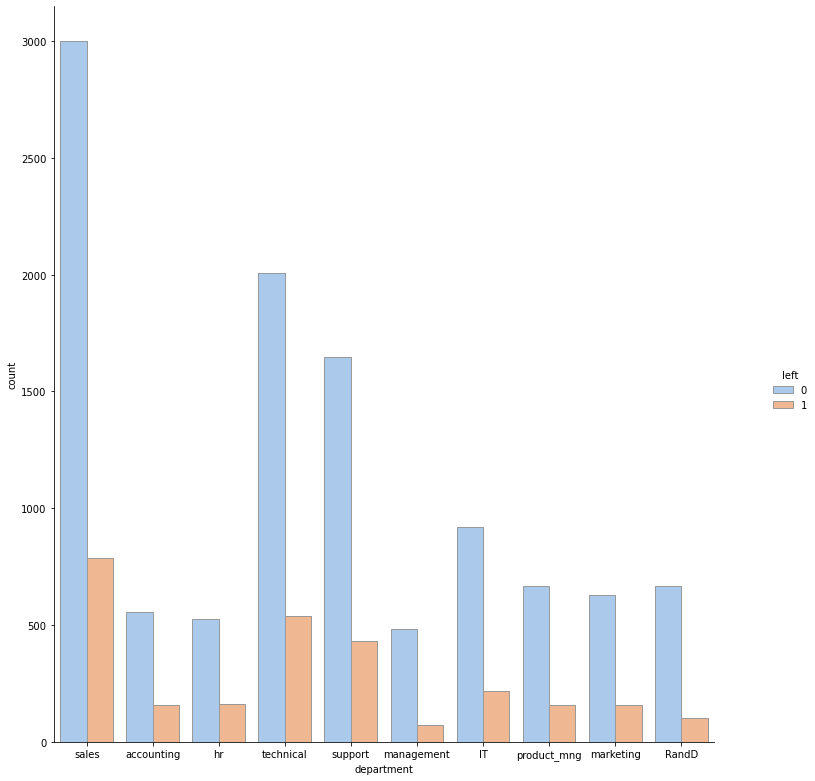

In [8]:
# Does deparment affects churn?
#plot categories histogram and split with explained variable
g=sns.catplot(x="department", hue="left", kind="count",
            palette="pastel", edgecolor=".6",
            data=inputdata)
g.fig.set_size_inches(12,12)

#and as a table - average churn rate per department
print(inputdata.groupby('department').mean()['left'])

# Churn is lower in RandD and managment.

#### We would like to transform the data in several ways:
1. dummify categorical variables
2. create a new variable 
3. Scale and Impute certain variables

In [9]:
# Split to train and test
train_img, test_img = train_test_split(inputdata, test_size=0.3, random_state=15)

In [10]:
# Alter department variables based on exploration
train_img['department'] = train_img['department'].apply(lambda x: 'other' if x not in ['RandD','management'] else x)
# Dummify the department variable
train_img = pd.concat([train_img, pd.get_dummies(train_img['department'])], axis=1)
train_img.drop('department', axis=1, inplace=True)
train_img.sample(5)

,average_monthly_hours,salary,number_project,last_evaluation,satisfaction_level,left,RandD,management,other
5052,165,medium,5,0.76,0.70,0,0,0,1
5544,256,medium,5,0.86,0.52,0,0,0,1
3344,98,medium,3,0.95,0.64,0,0,0,1
2089,208,medium,4,0.58,0.84,0,0,0,1
4549,215,low,5,0.78,0.90,0,0,0,1


In [11]:
# Make salary an ordinal variable
replace_map_salary = {'salary': {'low': 1, 'medium': 2, 'high': 3}}
train_img.replace(replace_map_salary, inplace=True)
train_img.sample(5)

,average_monthly_hours,salary,number_project,last_evaluation,satisfaction_level,left,RandD,management,other
6911,210,2,5,0.43,0.49,0,0,0,1
6480,164,2,4,0.69,0.52,0,0,0,1
614,296,2,7,0.90,0.09,1,0,0,1
6104,261,2,5,0.85,0.99,0,1,0,0
1047,151,3,2,0.49,0.37,1,0,0,1


In [12]:
# Create new variable - number of hours per project
train_img['hours_per_project'] = train_img['average_monthly_hours']/train_img['number_project']
train_img.sample(5)

,average_monthly_hours,salary,number_project,last_evaluation,satisfaction_level,left,RandD,management,other,hours_per_project
146,239,1,4,0.92,0.76,1,0,0,1,59.750000
5506,196,2,3,0.81,0.92,0,0,0,1,65.333333
3714,160,2,3,0.66,0.72,0,0,0,1,53.333333
1469,296,2,2,0.65,0.40,1,0,0,1,148.000000
8470,192,2,5,0.80,0.71,0,1,0,0,38.400000


In [13]:
# Scale the average monthly hours variable using the min-max scaler
scaler = sklearn.preprocessing.MinMaxScaler()
train_img['average_monthly_hours'] = scaler.fit_transform(train_img['average_monthly_hours'].values.reshape(-1,1))
train_img.sample(5)

,average_monthly_hours,salary,number_project,last_evaluation,satisfaction_level,left,RandD,management,other,hours_per_project
12767,0.144860,2,2,0.54,0.44,1,0,1,0,63.50
10979,0.757009,2,5,0.63,0.97,0,0,0,1,51.60
7651,0.481308,1,5,0.58,0.20,0,0,0,1,39.80
13170,0.056075,1,4,0.42,0.31,0,0,0,1,27.00
7409,0.640187,2,4,0.70,0.23,0,0,1,0,58.25


In [14]:
# Impute satisfaction level using the mean of the variable
train_img.satisfaction_level.fillna(train_img.satisfaction_level.mean(),inplace=True)
train_img.describe()

,average_monthly_hours,salary,number_project,last_evaluation,satisfaction_level,left,RandD,management,other,hours_per_project
count,9716.000000,9716.000000,9716.000000,9716.000000,9716.000000,9716.000000,9716.000000,9716.000000,9716.000000,9716.000000
mean,0.490870,1.599321,3.811033,0.716059,0.619291,0.200803,0.052491,0.040140,0.907369,56.856670
std,0.230901,0.633200,1.199033,0.169803,0.242445,0.400621,0.223026,0.196298,0.289929,19.199956
min,0.000000,1.000000,2.000000,0.360000,0.090000,0.000000,0.000000,0.000000,0.000000,16.166667
25%,0.285047,1.000000,3.000000,0.560000,0.460000,0.000000,0.000000,0.000000,1.000000,43.400000
50%,0.485981,2.000000,4.000000,0.720000,0.640000,0.000000,0.000000,0.000000,1.000000,53.666667
75%,0.696262,2.000000,5.000000,0.870000,0.810000,0.000000,0.000000,0.000000,1.000000,67.750000
max,1.000000,3.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,148.000000


In [15]:
# Let's use Random forest for classficiation
forest = RandomForestClassifier(n_estimators=100,n_jobs=1) # more hyperparameters can be added, but we keep it simple for now

In [16]:
X_train = train_img.drop(['left'], axis=1)
y_train = train_img.loc[:,'left']

forest.fit(X_train
           ,y_train)

RandomForestClassifier(n_jobs=1)

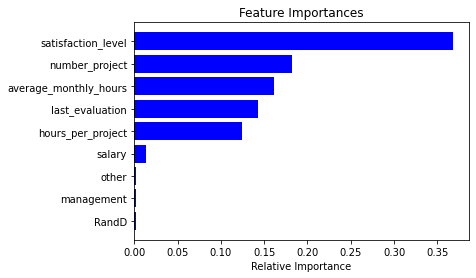

In [17]:
#Using feature importance, we can better understand which variables are contributing to the model the most.

features = X_train.columns
importances = forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
#Create pipeline to transform the test set
def test_transformation(test_set):
    test_set_copy = test_set.copy() #create a local copy
    test_set_copy['department'] = test_set_copy['department'].apply(lambda x: 'other' if x not in ['RandD','management'] else x) #transform department variable
    test_set_copy = pd.concat([test_set_copy, pd.get_dummies(test_set_copy['department'])], axis=1) #dummify categorical variable 
    test_set_copy.drop('department', axis=1, inplace=True) #remove categorical variable 
    test_set_copy.replace(replace_map_salary, inplace=True) #make salary variable ordinal
    test_set_copy['hours_per_project'] = test_set_copy['average_monthly_hours']/test_set_copy['number_project'] #create new variable
    test_set_copy['average_monthly_hours'] = scaler.transform(test_set_copy['average_monthly_hours'].values.reshape(-1,1)) #scale 
    test_set_copy.satisfaction_level.fillna(train_img.satisfaction_level.mean(),inplace=True) #impute
    return test_set_copy.drop(['left'], axis=1),test_set_copy.loc[:,'left'] #return X and y

X_test, y_test = test_transformation(test_img)

In [19]:
expected = y_test

# Make new predictions
predicted = forest.predict(X_test)

# Create confusion matrix
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3332
           1       0.94      0.92      0.93       832

    accuracy                           0.97      4164
   macro avg       0.96      0.95      0.96      4164
weighted avg       0.97      0.97      0.97      4164



## Exercise: save relevant model objects to be able to deploy the model to production

In [20]:
#Tip - Go through the theory to recall which model objects are relevant to save.
#Use the pickle package documentation to save the model objects

import pickle

# Save the model
pickle.dump(forest, open('model.pickle', 'wb'))
#Save the column names
pickle.dump(X_train.columns, open('columns.pickle', 'wb'))
# Save the imputation mean
pickle.dump(train_img.satisfaction_level.mean(), open('impute.pickle', 'wb'))


In [21]:
# Save the scaling parameters
pickle.dump(scaler, open('scaling.pickle', 'wb'))
# Save the salary encoder
pickle.dump(replace_map_salary, open('salary_encoding.pickle', 'wb'))
